In [1]:
%pip install -r requirements.txt
%pip install ./crowd-rl

Note: you may need to restart the kernel to use updated packages.
Processing ./crowd-rl
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for crowd-rl: filename=crowd_rl-0.0.1-py3-none-any.whl size=14195 sha256=b517f232cbb351c86fa9b639443995c27b364dcf3d4308fdfcd9224547002907
  Stored in directory: /home/kolibri/.cache/pip/wheels/76/75/c3/e0ee9023591d0c63c3f2436587e53ec2bcf47d39af5b80c0b4
Successfully built crowd-rl
  Attempting uninstall: crowd-rl
    Found existing installation: crowd-rl 0.0.1
    Uninstalling crowd-rl-0.0.1:
      Successfully uninstalled crowd-rl-0.0.1
Note: you may need to restart the kernel to use updated packages.


In [140]:
config = {
    "attendants": [
        {"id": "c1", "pos": {"x": 2, "y": 1}, "processing_time": [20, 50]},
        {"id": "c2", "pos": {"x": 4, "y": 1}, "processing_time": [10, 20]},
        {"id": "c3", "pos": {"x": 6, "y": 1}, "processing_time": [10, 20]},
        {"id": "p1", "pos": {"x": 9, "y": 1}, "processing_time": 30},
    ],
    "queues": [
        {
            "order": 0,
            "accepts": ["common", "pref"],
            "attendants": ["c1", "c2", "c3"],
            "wait_spots": [
                {"x": 1, "y": 4},
                {"x": 1, "y": 5},
                {"x": 2, "y": 5},
                {"x": 3, "y": 5},
                {"x": 4, "y": 5},
                {"x": 5, "y": 5},
                {"x": 6, "y": 5},
                {"x": 7, "y": 5},
                {"x": 7, "y": 6},
                {"x": 7, "y": 7},
                {"x": 6, "y": 7},
                {"x": 5, "y": 7},
                {"x": 4, "y": 7},
                {"x": 3, "y": 7},
                {"x": 2, "y": 7},
                {"x": 1, "y": 7},
                {"x": 1, "y": 8},
            ],
        },
        {
            "order": 0,
            "accepts": ["pref"],
            "attendants": ["p1"],
            "wait_spots": [
                {"x": 9, "y": 4},
                {"x": 9, "y": 5},
                {"x": 9, "y": 6},
                {"x": 9, "y": 7},
                {"x": 9, "y": 8},
            ],
        },
    ],
    "entrances": [{"pos": {"x": 0, "y": 11}, "rate": 5, "accepts": ["common", "pref"]}],
    "exits": [
        {"pos": {"x": 14, "y": 0}, "accepts": ["pref"]},
        {"pos": {"x": 14, "y": 0}, "accepts": ["common", "pref"]},
    ],
    "groups": [
        {"name": "common", "amount": 15},
        {"name": "pref", "amount": 9},
    ],
    "worldmap": [
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
    ]
}

In [7]:
# Config Small
config = {
    "attendants": [
        {"id": "c1", "pos": {"x": 2, "y": 1}, "processing_time": 1},
    ],
    "queues": [
        {
            "order": 0,
            "accepts": ["common", "pref"],
            "attendants": ["c1"],
            "wait_spots": [
                {"x": 2, "y": 3},
                {"x": 2, "y": 4},
                {"x": 2, "y": 5},
            ],
        },
    ],
    "entrances": [{"pos": {"x": 0, "y": 6}, "rate": 5, "accepts": ["common", "pref"]}],
    "exits": [
        {"pos": {"x": 4, "y": 0}, "accepts": ["common", "pref"]},
    ],
    "groups": [
        {"name": "common", "amount": 1},
    ],
    "worldmap": [
        [1, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1],
    ],
}

In [1]:
config = {
    "attendants": [
        {"id": "p1", "pos": {"x": 3, "y": 1}, "processing_time": [20, 50]},
        {"id": "c1", "pos": {"x": 5, "y": 1}, "processing_time": [10, 20]},
        {"id": "c2", "pos": {"x": 7, "y": 1}, "processing_time": [10, 20]},
        {"id": "c3", "pos": {"x": 9, "y": 1}, "processing_time": 30},
    ],
    "queues": [
        {
            "order": 0,
            "accepts": ["pref"],
            "attendants": ["p1"],
            "wait_spots": [
                {"x": 3, "y": 4},
                {"x": 3, "y": 5},
                {"x": 3, "y": 6},
                {"x": 3, "y": 7},
                {"x": 3, "y": 8},
            ],
        },
        {
            "order": 0,
            "accepts": ["common", "pref"],
            "attendants": ["c1"],
            "wait_spots": [
                {"x": 5, "y": 4},
                {"x": 5, "y": 5},
                {"x": 5, "y": 6},
                {"x": 5, "y": 7},
                {"x": 5, "y": 8},
            ],
        },
        {
            "order": 0,
            "accepts": ["common", "pref"],
            "attendants": ["c2"],
            "wait_spots": [
                {"x": 7, "y": 4},
                {"x": 7, "y": 5},
                {"x": 7, "y": 6},
                {"x": 7, "y": 7},
                {"x": 7, "y": 8},
            ],
        },
        {
            "order": 0,
            "accepts": ["common", "pref"],
            "attendants": ["c3"],
            "wait_spots": [
                {"x": 9, "y": 4},
                {"x": 9, "y": 5},
                {"x": 9, "y": 6},
                {"x": 9, "y": 7},
                {"x": 9, "y": 8},
            ],
        },
    ],
    "entrances": [
        {"pos": {"x": 0, "y": 11}, "rate": 5, "accepts": ["common", "pref"]},
    ],
    "exits": [
        {"pos": {"x": 14, "y": 0}, "accepts": ["common", "pref"]},
    ],
    "groups": [
        {"name": "common", "amount": 15},
        {"name": "pref", "amount": 5},
    ],
    "worldmap": [
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
    ]
}

In [ ]:
config = {
    "attendants": [
        {"id": "porta1", "pos": {"x": 2, "y": 1}, "processing_time": [5, 15]},
        {"id": "porta2", "pos": {"x": 4, "y": 1}, "processing_time": [3, 20]},
        {"id": "CNH1", "pos": {"x": 8, "y": 11}, "processing_time": 30},
        {"id": "RG1", "pos": {"x": 10, "y": 11}, "processing_time": 30},
        {"id": "TITULO1", "pos": {"x": 12, "y": 11}, "processing_time": 30},
    ],
    "queues": [
        {
            "order": 0,
            "accepts": ["CNH", "RG", "TITULO", "AGENDAMENTO"],
            "attendants": ["porta1", "porta2"],
            "wait_spots": [
                {"x": 1, "y": 5},
                {"x": 1, "y": 6},
                {"x": 2, "y": 6},
                {"x": 3, "y": 6},
                {"x": 4, "y": 6},
                {"x": 4, "y": 7},
                {"x": 4, "y": 8},
                {"x": 3, "y": 8},
                {"x": 2, "y": 8},
                {"x": 1, "y": 8},
                {"x": 1, "y": 9},
            ],
        },
        {
            "order": 1,
            "accepts": ["CNH"],
            "attendants": ["CNH1"],
            "wait_spots": [
                {"x": 8, "y": 9},
                {"x": 8, "y": 8},
                {"x": 8, "y": 7},
                {"x": 8, "y": 6},
                {"x": 8, "y": 5},
            ],
        },
        {
            "order": 1,
            "accepts": ["RG"],
            "attendants": ["RG1"],
            "wait_spots": [
                {"x": 10, "y": 9},
                {"x": 10, "y": 8},
                {"x": 10, "y": 7},
                {"x": 10, "y": 6},
                {"x": 10, "y": 5},
            ],
        },
           {
            "order": 1,
            "accepts": ["TITULO"],
            "attendants": ["TITULO1"],
            "wait_spots": [
                {"x": 12, "y": 9},
                {"x": 12, "y": 8},
                {"x": 12, "y": 7},
                {"x": 12, "y": 6},
                {"x": 12, "y": 5},
            ],
        },
    ],
    "entrances": [
        {"pos": {"x": 0, "y": 11}, "rate": 5, "accepts": ["CNH", "RG", "TITULO", "AGENDAMENTO"]},
    ],
    "exits": [
        {"pos": {"x": 6, "y": 12}, "accepts": ["CNH", "RG", "TITULO", "AGENDAMENTO"]},
    ],
    "groups": [
        {"name": "CNH", "amount": 7},
        {"name": "RG", "amount": 5},
        {"name": "TITULO", "amount": 6},
    ],
    "worldmap": [
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, ],
        [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ],
        [1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ],
        [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, ],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ],
    ]
}

In [2]:
import random
from copy import deepcopy

import numpy as np
from crowd_rl import crowd_rl_v0 as crowd
from tests.test_configs import mall

if __name__ == "__main__":
    env = crowd.env(config=config, queue_bias=2, render_mode="human")
    env.reset(seed=42)

    for agent in env.agent_iter():
        observation, reward, termination, truncation, info = env.last()

        if termination or truncation:
            action = None
        else:
            obs = observation

            distances = obs[:4]
            action = np.where(distances == distances.min())[0]
            action = action[random.randint(0, len(action) - 1)]
            action += 1


        env.step(action)

    env.close()

In [1]:
%pip install seaborn
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [142]:
busy_time_attendant = {}
waiting_time_agent = {}
attendant_attending = []
agent_waiting_queue = []

for num, x in frame_attendant_data.items():
    total_busy = 0
    
    for key, value in x.items():
        if not key in busy_time_attendant:
            busy_time_attendant[key] = {}
            busy_time_attendant[key]["busy"] = 0

        if value.busy:
            busy_time_attendant[key]["busy"] += 1
            total_busy += 1
    attendant_attending.append(total_busy)


for num, x in frame_agent_data.items():
    total_waiting = 0
    total_attendance = 0
    
    for _, value in x.items():
        key = value.group
        if not key in waiting_time_agent:
            waiting_time_agent[key] = {}
            waiting_time_agent[key]["in_queue"] = 0
            waiting_time_agent[key]["in_attendance"] = 0

        if value.in_queue:
            waiting_time_agent[key]["in_queue"] += 1
            total_waiting += 1

        if value.in_attendance:
            waiting_time_agent[key]["in_attendance"] += 1
            total_attendance += 1
    agent_waiting_queue.append(total_waiting)

    

agent_heatmap = np.zeros(shape=(mall.env_config.height, mall.env_config.width))
for x in frame_agent_data.values():
    for y in x.values():
        agent_heatmap[y.pos.y][y.pos.x] += 1

# Tempo gasto em atendimento por atendente
# e
# Atendimento ocupado

Text(0.5, 0.98, 'Tempo gasto em atendimento')

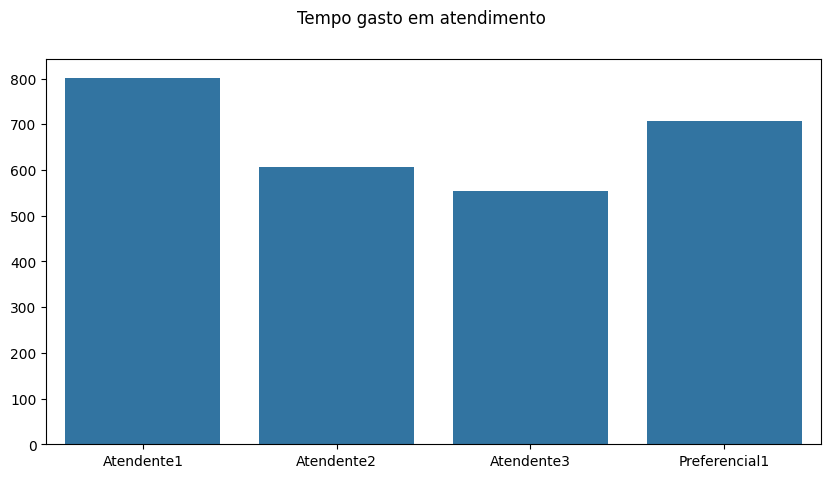

In [144]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(x = ["Atendente1", "Atendente2", "Atendente3", "Preferencial1"], y = [x["busy"] for x in busy_time_attendant.values()])
fig.suptitle('Tempo gasto em atendimento')

ValueError: All arrays must be of the same length

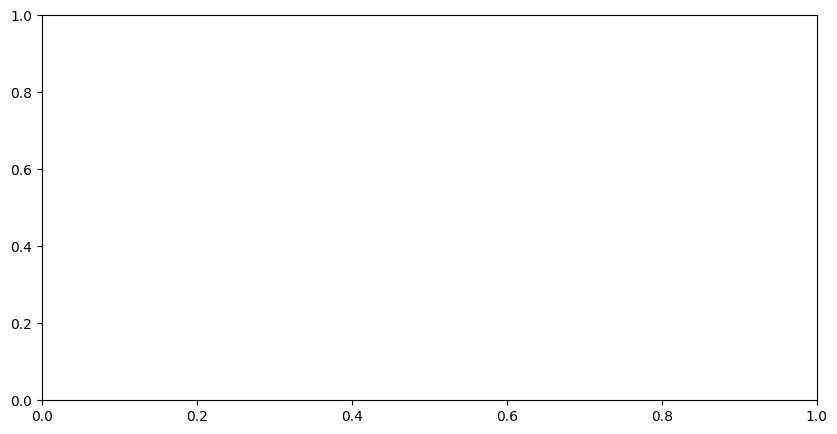

In [138]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(x = ["Comum", "Preferencial"], y = [x["in_queue"] for x in waiting_time_agent.values()])
fig.suptitle('Tempo total gasto em fila por grupo')

Text(0.5, 0.98, 'Tempo gasto em atendimento por grupo')

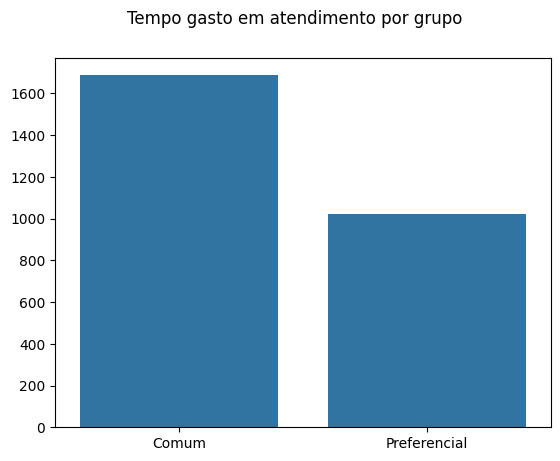

In [66]:
fig, axes = plt.subplots()
sns.barplot(x = ["Comum", "Preferencial"], y = [x["in_attendance"] for x in waiting_time_agent.values()])
fig.suptitle('Tempo gasto em atendimento por grupo')

Text(0.5, 0.98, 'Ocupação de atendentes por tempo')

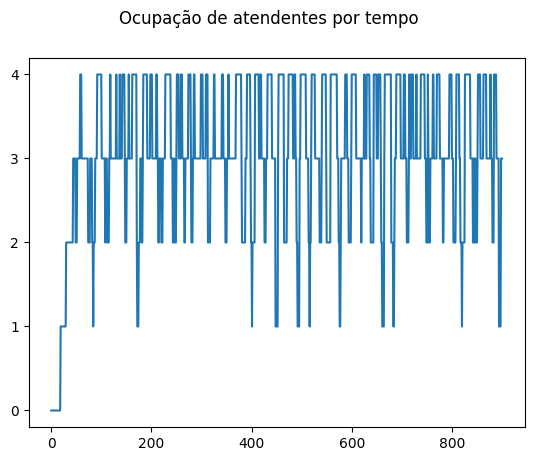

In [41]:
fig, axes = plt.subplots()
g = sns.lineplot(attendant_attending)
g.set_yticks(range(max(attendant_attending) + 1)) 
fig.suptitle('Ocupação de atendentes por tempo')

TypeError: 'Figure' object is not callable

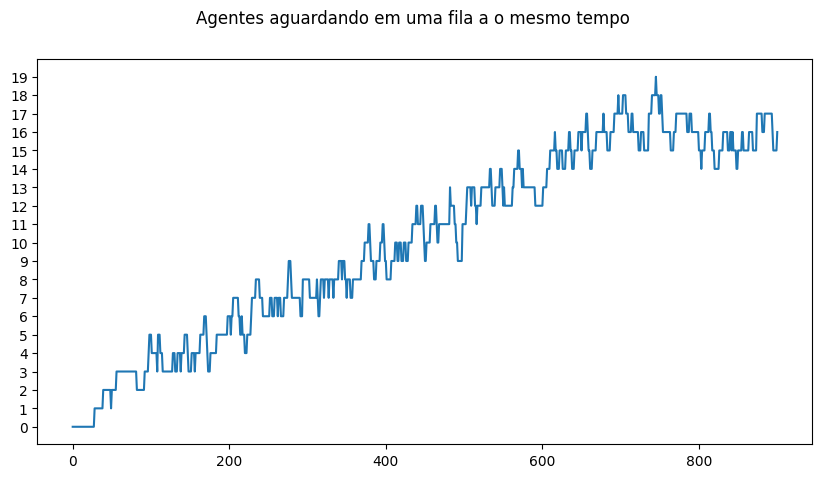

In [74]:
fig, axes = plt.subplots(figsize=(10, 5))
g = sns.lineplot(agent_waiting_queue)
g.set_yticks(range(max(agent_waiting_queue) + 1)) 
fig.suptitle('Agentes aguardando em uma fila a o mesmo tempo')
fig.figure(figsize=(10,6))

# Mapa de calor, trafego de agentes

Text(0.5, 0.98, 'Mapa de calor agentes')

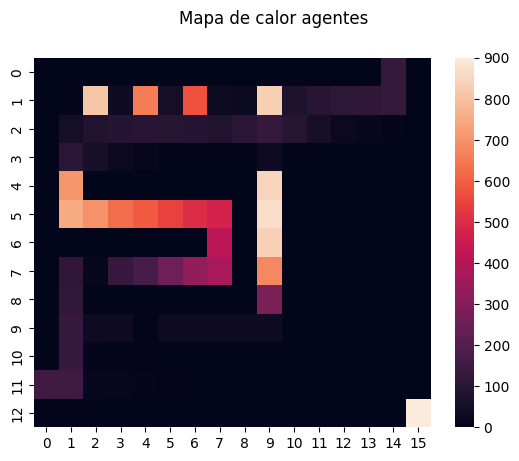

In [40]:
fig, axes = plt.subplots()
sns.heatmap(agent_heatmap, vmax=900)
fig.suptitle('Mapa de calor agentes')